<a href="https://colab.research.google.com/github/Yogesh6301/Dog_and_Cat_Classifiers/blob/main/Deep_learning_Dog_And_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


In [ ]:
ls

cats_and_dogs_filtered.zip  cats_and_dogs_filtered.zip.1  sample_data/


In [ ]:
!unzip cats_and_dogs_filtered.zip

In [ ]:
from PIL import Image

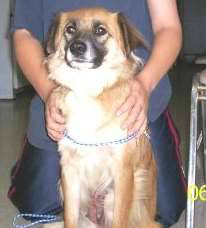

In [ ]:
Image.open("cats_and_dogs_filtered/validation/dogs/dog.2123.jpg")

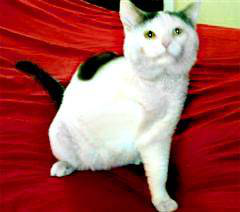

In [ ]:
Image.open("cats_and_dogs_filtered/validation/cats/cat.2124.jpg")

In [ ]:
Dir = "cats_and_dogs_filtered/"
train_Dir = Dir + "train"
test_Dir =  Dir + "validation"

cat_train_Dir = train_Dir + "/cats"
cat_test_Dir =  test_Dir  + "/cats"

dog_train_Dir = train_Dir +"/dogs"
dog_test_Dir  = test_Dir +"/dogs"

In [ ]:
import os

In [ ]:
train_cat_images = os.listdir(cat_train_Dir)
test_cat_images=os.listdir(cat_test_Dir)

test_dog_images = os.listdir(dog_train_Dir)
test_dog_images=os.listdir(dog_test_Dir)

In [ ]:
#### Start CNN Algorithms............

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator= ImageDataGenerator(1/255)

In [ ]:
train_data_generator = generator.flow_from_directory(train_Dir, target_size=(124, 124), batch_size=20, class_mode="categorical")
test_data_generator =  generator.flow_from_directory(test_Dir, target_size=(124, 124), batch_size=20, class_mode="categorical")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_data_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
####  Create Your Model.....

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), activation="relu", input_shape = (124, 124, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))


### Add  Flatten Layer
model.add(Flatten())


## Add Dense layer
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation="softmax"))

In [ ]:
## Test Instruction...

In [ ]:
## model= Sequential()

In [ ]:
## model.add(Dense(2, activation="relu", input_shape =(2,)))
## model.add(Dense(1, activation="relu"))

In [ ]:
## model.summary()

In [ ]:
## model.summary()

In [ ]:
model.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
H = model.fit_generator(train_data_generator, epochs=10, validation_data=test_data_generator)

Epoch 1/10
  1/100 [..............................] - ETA: 8s - loss: 6238.4219 - accuracy: 0.5500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 8s 82ms/step - loss: 147.6614 - accuracy: 0.5200 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 2/10
100/100 [==============================] - 8s 79ms/step - loss: 0.7322 - accuracy: 0.5235 - val_loss: 0.6938 - val_accuracy: 0.4910
Epoch 3/10
100/100 [==============================] - 8s 79ms/step - loss: 0.7081 - accuracy: 0.5185 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 4/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6958 - accuracy: 0.5145 - val_loss: 0.6933 - val_accuracy: 0.5060
Epoch 5/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6910 - accuracy: 0.5505 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6813 - accuracy: 0.5485 - val_loss: 0.6953 - val_accuracy: 0.5020
Epoch 7/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6778 - accuracy: 0.5545 - val_loss: 0.6943 - val_accuracy: 0.4950
Epoch 8/

In [ ]:
dog_train_Dir

'cats_and_dogs_filtered/train/dogs'

In [ ]:
ImagePath = 'cats_and_dogs_filtered/train/dogs/dog.2242.jpg'

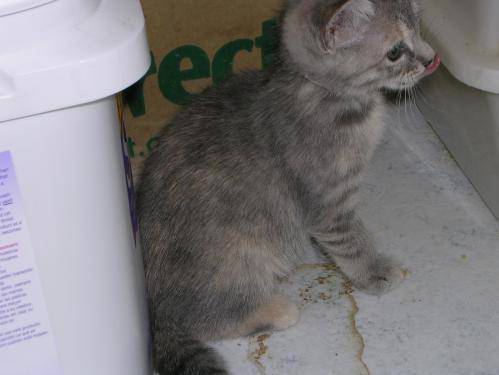

In [ ]:
Image.open("cats_and_dogs_filtered/train/cats/cat.187.jpg")

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import numpy as np


In [ ]:
image = cv2.imread("cats_and_dogs_filtered/train/cats/cat.187.jpg")

In [ ]:
image = cv2.resize(image, (124, 124))

In [ ]:
image.shape

(124, 124, 3)

In [ ]:
image = image.astype('float')/255

In [ ]:
image = img_to_array(image)

In [ ]:
image = np.expand_dims(image, axis=0)

In [ ]:
model.predict(image)

array([[0.5153282, 0.4846717]], dtype=float32)

In [ ]:
model.predict_classes(image)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])